# Learning Customer Segmentation
## Introduction
I am interested in learning more about machine learning and applying this method to real-world problems. For example, I notice that businesses can use machine learning for customer segmentation. Therefore, I have found some resources to help teach me what customer segmentation is and how to do it through python. I am interested in doing this in R too!

Before diving into applying machine learning to a customer segmentation problem, I will explain what it is and why to use it. Doing this explanation of what it is and why to use it is for my benefit so that I can remember what I am doing and talk about it later. Additionally, I will be following a [tutorial](https://www.mktr.ai/how-to-ignite-growth-with-customer-segmentation/) because this is my first time learning how to do this. I hope to apply some of the things I learn to other data sets in the future. 

## What is Customer Segmentation?
Customer segmentation is the process by which you divide your customers up based on common characteristics ([Qualtrics](https://www.qualtrics.com/experience-management/brand/customer-segmentation/))
These characteristics can be based on:
- demographics
- behaviors
- geographic
- psychographic


[More details about customer segmentation](https://www.mktr.ai/how-to-ignite-growth-with-customer-segmentation/)

## Why use customer segmentation?
Customer segmentation can help market and sell more effectively because you learn more about the customers' needs and desires. Therefore, this can increase customer lifetime value, which means customers will stay longer and spend more.

Effectively increasing the customer lifetime value can lead to targeting customers to become loyal customers. There is more value in obtaining returning customers than having one-off customers. Additionally, returning customers' data can be a better predictive indicator of behavior to help inform business decisions. 

To learn more about customer lifetime value (CLV), [here is a link to a qualtrics article.](https://www.qualtrics.com/experience-management/customer/customer-lifetime-value/)

## Customer Segmentation Methods
The tutorial I am following says that analysts can use several methods to perform segmentation, which vary in rigor, data requirements, and purpose. Therefore, I will be following more broad practices and not the exhaustive list of methods. 

The first method I will perform on a data set is cluster analysis.

## Cluster Analysis
It is a method to group or cluster consumers based on similarities.

Two types of cluster analyses are hierarchical and partitioning. The tutorial is based on the latter, called k-means clustering. 

## Data
The dataset I will be using comes from this [link](http://archive.ics.uci.edu/ml/datasets/online+retail). The data is a global dataset that contains all transactions occurring between 01/12/2010 and 12/15/2011 for a UK-based non-store online retail company that mainly sells unique all-occasion gifts. 

### Data Index
- InvoiceNo: A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
- StockCode: A 5-digit integral number uniquely assigned to each distinct product
- Description: Product (item) name
- Quantity: The quantities of each product (item) per transaction
- InvoiceDate: The day and time when each transaction was generated
- UnitPrice: Product price per unit in sterling
- CustomerID: A 5-digit integral number uniquely assigned to each customer
- Country: The name of the country where each customer resides

Below I begin reading in the data file and start the analysis. I will annotate the code as much as possible and provide interpretations of what is going on after completing the code.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#reading the excel spreadsheet using pandas
#I have the excel file and jupyter notebook in the same folder on my computer so that is easier to read in
df = pd.read_excel('onlineretail.xlsx', sheet_name = 'Online Retail')
df.head() #looking at the first five rows of the dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

We can see from the first five rows there are eight columns. So based on the df.shape argument, we see there are eight columns and 541,909 rows of data. 

Next, I will do some data cleanup to remove data that isn't helpful and is missing. 


In [4]:
#dropping cancelled orders
df = df.loc[df['Quantity'] > 0]

#dropping records without CustomerID
df = df[pd.notnull(df['CustomerID'])]

#dropping incomplete month
#I examined the excel file to see this suggestion from the tutorial, 
#but a better way could be done to get this information
df = df.loc[df['InvoiceDate'] < '2011-12-01']

#calculating the total sales from the Quantity and UnitPrice columns
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Now I will transform the data so that each record represents a single customer's purchase history.

In [5]:
#using groupby to agrregate sales by CustomerID
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

#selecting the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount']

#creating a new column 'AvgOrderValue'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


Now I have a data frame with total sales, order count, and the average order value for each customer.

## Normalizing the Data
The data needs to be normalized because clustering algorithms like K-means are sensitive to the scales represented in the data. Here is a [link](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering) that discusses the importance of normalizing data for K-means clustering. 

In [6]:
rank_df = customer_df.rank(method = 'first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


I normalized the data between -2 and 2. I can begin clustering now. 

## Selecting the Optimal Number of Clusters
To determine the number of clusters, we can use the tutorial's two methods: 1) the Silhouette coefficient and 2) the elbow method. Of course, there are more approaches than these two, but I will be learning these for now. 

## Silhouette Method
In this [Link](https://www.mktr.ai/applications-and-methods-in-data-science-customer-segmentation/) a Wikipedia page explains the silhouette method to determine the number of clusters we want to use. 

Below, I will be implementing the silhouette method.

In [7]:
#using silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score

for n_cluster in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = n_cluster).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    silhouette_avg = silhouette_score(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.4288
Silhouette Score for 3 Clusters: 0.4133
Silhouette Score for 4 Clusters: 0.4117
Silhouette Score for 5 Clusters: 0.3779
Silhouette Score for 6 Clusters: 0.3784
Silhouette Score for 7 Clusters: 0.3907
Silhouette Score for 8 Clusters: 0.3808


One thing from the tutorial is that it leaves out 2 and 3 clusters from the results. To me, if the higher silhouette score tells us to use that cluster number, then it is 2. However, we can utilize additional methods to suggest the cluster number. The tutorial says to use 4, and we will see about that after using the elbow method.

## The Elbow Method with the Sum of Squared Errors (SSE)
Here is a [link](https://www.mktr.ai/applications-and-methods-in-data-science-customer-segmentation/) that details the elbow method. 

I will use this method to see if it agrees with the tutorial to use 4 clusters and compare it to the silhouette method.

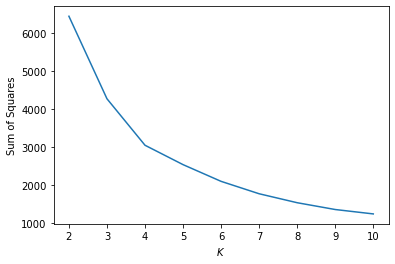

In [8]:
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,11))
X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

When using the elbow method, we want to minimize the sum of squared errors (SSE), which in SSE tends to decrease to 0 as we increase k. However, SSE is 0 when k is equal to the number of data points in the dataset, so the goal is to find a small value of k that still has a low SSE. Usually, the elbow in the graph represents where we start to have diminishing returns by increasing k. 

In the graph above, that elbow does appear to be at k = 4. There is a bend at three. So I imagine one could argue that 2 or 3 is better, but we want to minimize SSE. Therefore, those SSE values are too high to use 2 or 3 clusters. Consequently, I will have k = 4 or 4 clusters for the analysis. 

## Interpreting Customer Segments


In [9]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

four_cluster_df.head(10)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,0
12348.0,0.967466,0.573388,0.929590,0
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2
12352.0,1.193114,1.309162,0.169639,0
12353.0,-1.636352,-1.729029,-1.570269,1
12354.0,0.508917,-1.728223,1.612981,2
12355.0,-0.386422,-1.727417,0.970690,2


Next, I will group the cluster metrics and see what we can gather from the normalized data for each cluster.

In [10]:
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)

cluster_center_df.columns = four_cluster_df.columns[0:3]
cluster_center_df

,TotalSales,OrderCount,AvgOrderValue
0,1.201902,0.992124,0.880877
1,-1.242695,-0.789564,-1.062751
2,-0.143982,-0.854148,0.785366
3,0.236853,0.732547,-0.640991


This table gives us the metrics of each cluster, but visually, it isn't the best way to inform us what customers make up each cluster. So we will create some visualizations for the data. 

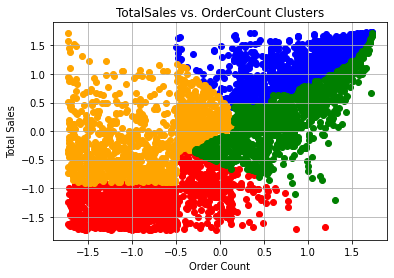

In [11]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()

From the visualization above, we can see that the customers in the red have low orders and low total sales. However, the customers in the blue are high total sales and high order counts. Therefore, the red customers are low-value customers, and the blue customers are the high-value customers. 

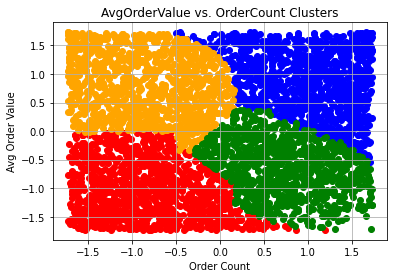

In [12]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

This visualization shows that the red customers are low value because their average order value and order counts are low. However, we see that the blue customers are our higher-value customers because they regularly order from us. Additionally, their average order value is high. 

Therefore, we can try to market to the red customers to order more from us. For the green customers, we might want to try and get them to up their order value when they purchase from us. 



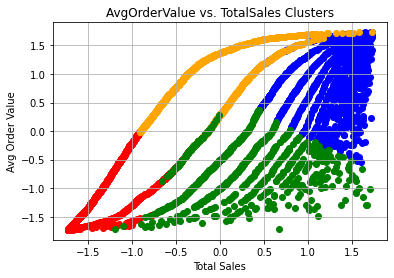

In [14]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

This plot further indicates that the blue customers are our highest value customers. As the total sales increase, so does the average order value. 

To grow, we could focus on the green customers and orange customers. 

## Finding the Best-Selling item by segment
We know that we have four segments and how much they spend per purchase, their total spending, and their number of orders. Next, to better understand the customer segments, I can identify the best-selling item in each segment. I will focus on our highest value customers, the blue customers. 

In [16]:
#
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 0]

pd.DataFrame(df.loc[df['CustomerID'].isin(high_value_cluster.index)].groupby(
    'Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1129
REGENCY CAKESTAND 3 TIER,1082
WHITE HANGING HEART T-LIGHT HOLDER,1062
LUNCH BAG RED RETROSPOT,924
PARTY BUNTING,859


We can see that the best-selling item is the red retrospot jumbo bag. However, we could suggest other things these customers might like using this information. 

## Conclusion
I have learned a lot about customer segmentation and how that information could inform people to make business decisions. I hope to find another dataset to do another customer segmentation and continue learning how to use data science to make business decisions. 

# Below are some links to continue learning customer segmentation and cluster analyses
https://www.analyticsvidhya.com/blog/2021/06/how-to-solve-customer-segmentation-problem-with-machine-learning/

https://www.mktr.ai/applications-and-methods-in-data-science-customer-segmentation/

https://www.qualtrics.com/experience-management/customer/customer-lifetime-value/

https://www.qualtrics.com/experience-management/brand/customer-segmentation/

https://uc-r.github.io/kmeans_clustering